In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
path = "/home/sg666/MDpLM/data/uniref50/100k_seqs"

In [5]:
train = pd.read_csv(path + "/train.csv")
test = pd.read_csv(path + "/test.csv")
val = pd.read_csv(path + '/val.csv')

In [23]:
valid_residues = ['A','R','N','D','C','E','Q','G','H','I','L','K','M','F','P','S','T','W','Y','V']

for df in [train, test, val]:
    df['Length'] = df['Sequence'].str.len()

    for residue in valid_residues:
        df[residue] = 0

    for idx, row in df.iterrows():
        sequence = row['Sequence']

        for residue in valid_residues:
            df.at[idx, residue] = sequence.count(residue)

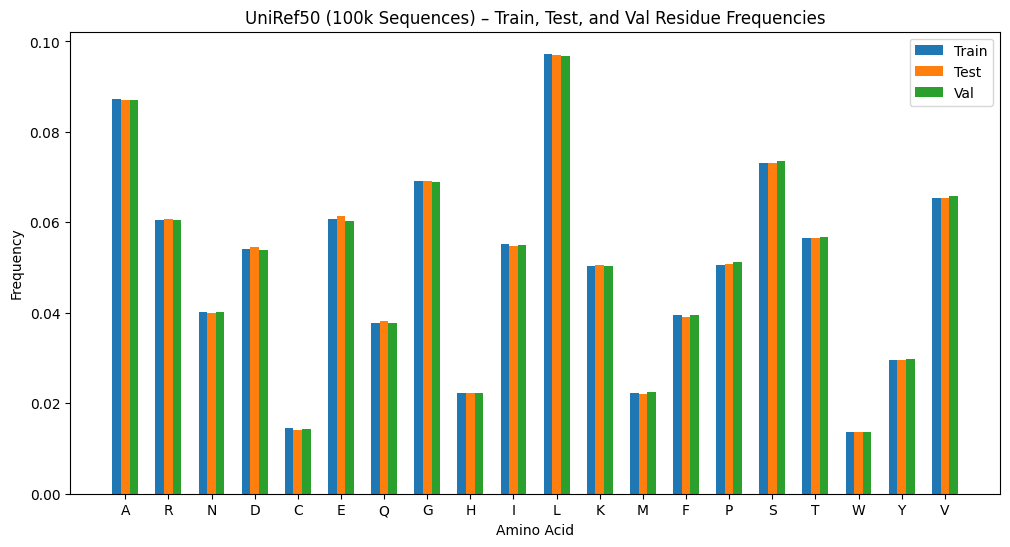

In [28]:
amino_acid_frequencies = {}

datasets = {'Train': train, 'Test': test, 'Val': val}


for name, df in datasets.items():
    # Count total occurrences of each amino acid in each dataset
    amino_acid_frequencies[name] = df[valid_residues].sum() / df['Length'].sum()

# Convert frequencies to a dataframe for easier manipulation
freq_df = pd.DataFrame(amino_acid_frequencies)

# Plot the histogram comparing amino acid frequencies
plt.figure(figsize=(12, 6))

# Set bar width
bar_width = 0.2

# Generate positions for the bars
amino_acids = list(valid_residues)
x = np.arange(len(amino_acids))  # positions for the amino acids

# Plot the bars for each dataset with an offset
plt.bar(x - bar_width, freq_df['Train'], width=bar_width, label='Train', align='center')
plt.bar(x, freq_df['Test'], width=bar_width, label='Test', align='center')
plt.bar(x + bar_width, freq_df['Val'], width=bar_width, label='Val', align='center')

plt.xticks(x, amino_acids)

plt.title('UniRef50 (100k Sequences) - Train, Test, and Val Residue Frequencies')
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')

plt.legend()
plt.show()

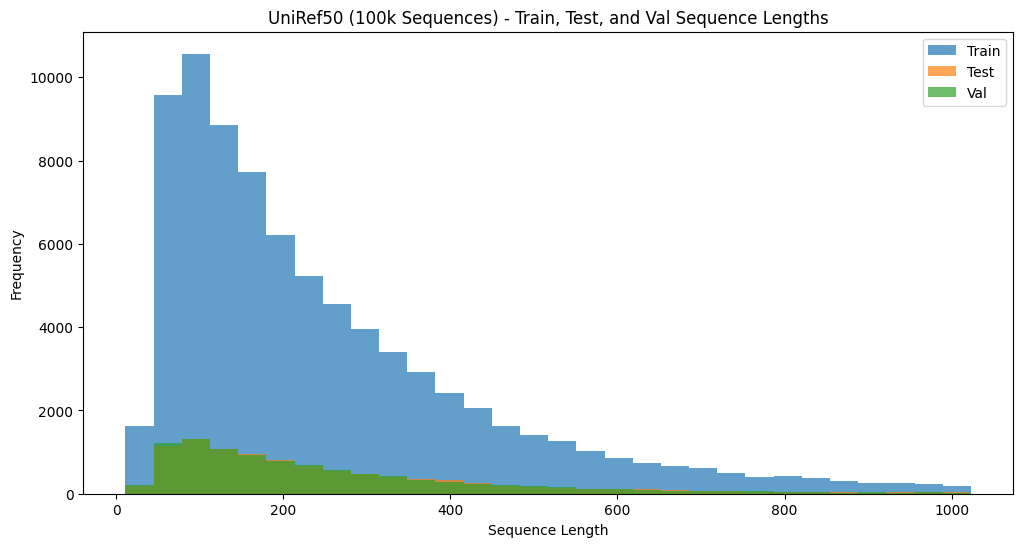

In [30]:
# 2. Sequence lengths histogram
plt.figure(figsize=(12, 6))
for name, df in datasets.items():
    plt.hist(df['Length'], bins=30, alpha=0.7, label=name, density=True)

plt.title('UniRef50 (100k Sequences) - Train, Test, and Val Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()